# load package

In [10]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib notebook
#%matplotlib inline
#%matplotlib ipympl
#%matplotlib widget

# get image

In [2]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg

--2021-04-29 23:47:40--  http://images.cocodataset.org/val2017/000000439715.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.161.105
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.161.105|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209222 (204K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>] 204.32K   337KB/s    in 0.6s    

2021-04-29 23:47:41 (337 KB/s) - ‘input.jpg’ saved [209222/209222]



<IPython.core.display.Javascript object>


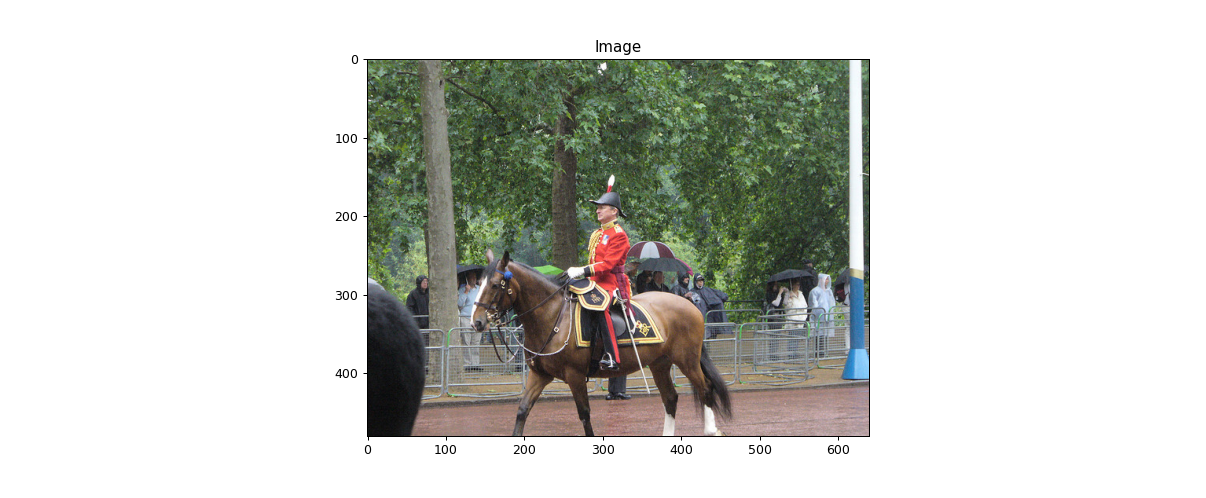

In [12]:
im = cv2.imread("./input.jpg")
color = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(color)
plt.title('Image')
plt.show()

# create config

In [13]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

# create predictor

In [21]:
predictor = DefaultPredictor(cfg)

# Make prediction

In [20]:
outputs = predictor(im)

# visualization

In [19]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

<IPython.core.display.Javascript object>


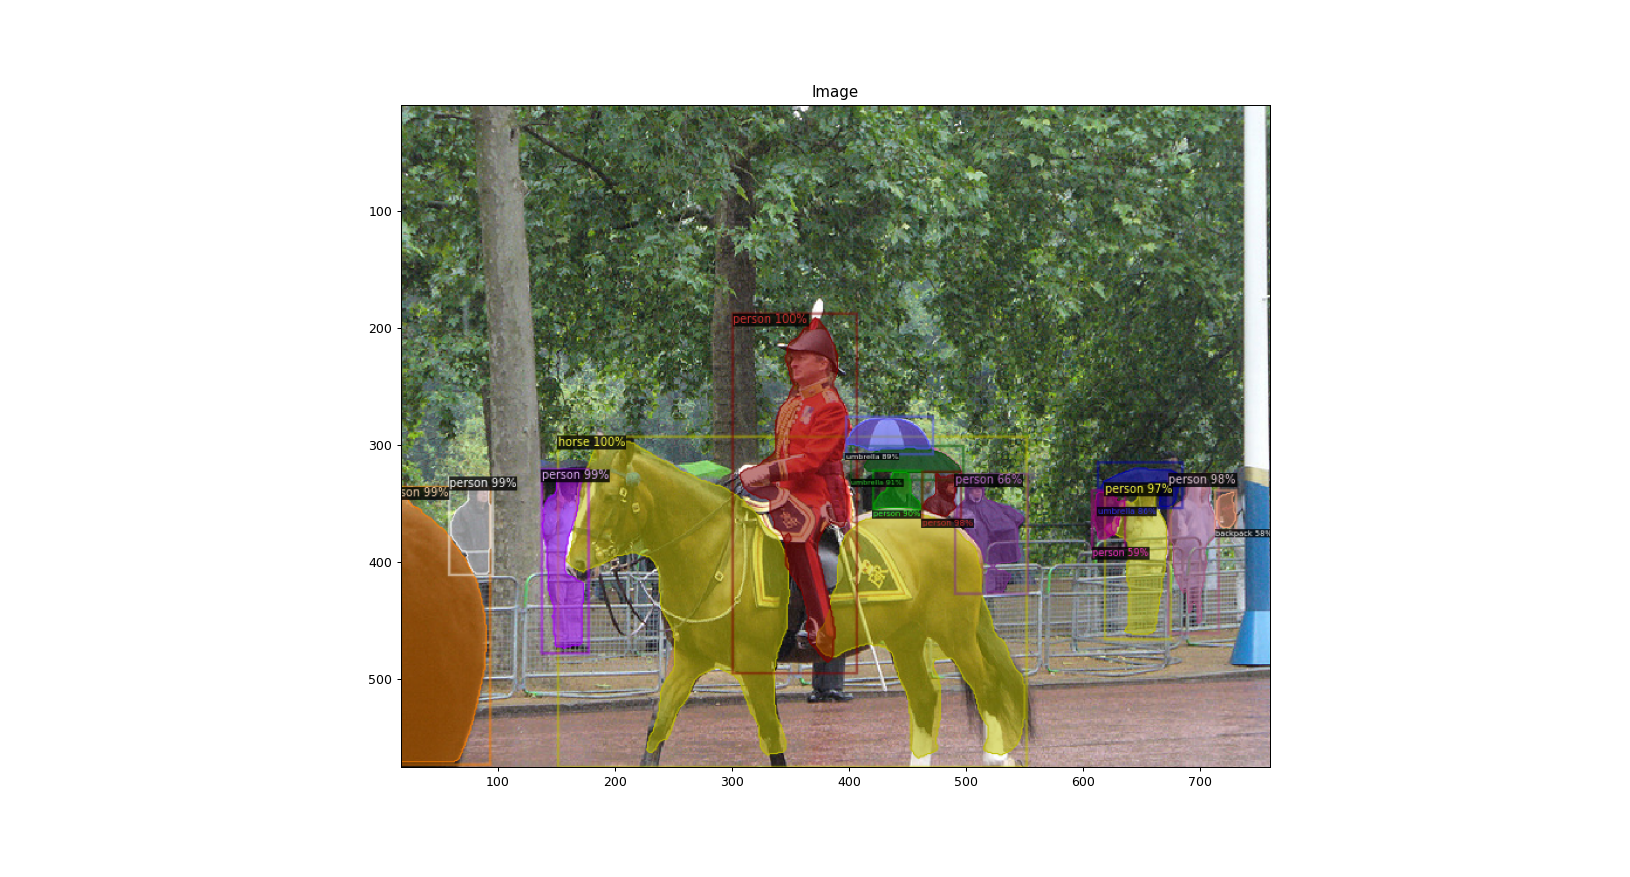

In [22]:
#cv2.imshow("",v.get_image()[:, :, ::-1])
color = cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)
#fig = px.imshow(color)
#fig.show()
plt.imshow(color)
plt.title('Image')
plt.show()